# Forest Cover Type Prediction

In [26]:
# Installing the modules

!pip3 install kaggle

     |████████████████████████████████| 76.3 MB 1.2 MB/s 


In [34]:
# Required modules

import numpy as np
import pandas as pd
import seaborn as sns

from zipfile import ZipFile
from google.colab import files
from matplotlib import pyplot as plt

from sklearn.ensemble import ExtraTreesClassifier
from sklearn.model_selection import train_test_split

In [3]:
# Config

%matplotlib inline
plt.rcParams['figure.figsize'] = (12, 12)

In [4]:
# Upload the creds

files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"anurag1817","key":"09b66f16e6edda0614443b2a02389465"}'}

In [5]:
# Create kaggle folder

!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [6]:
# Test the command

!kaggle competitions download -c forest-cover-type-prediction

  0% 0.00/1.19M [00:00<?, ?B/s]
100% 1.19M/1.19M [00:00<00:00, 83.0MB/s]
  0% 0.00/351k [00:00<?, ?B/s]
100% 351k/351k [00:00<00:00, 23.4MB/s]
sampleSubmission.csv.zip: Skipping, found more recently modified local copy (use --force to force download)
train.csv.zip: Skipping, found more recently modified local copy (use --force to force download)
  0% 0.00/161 [00:00<?, ?B/s]
100% 161/161 [00:00<00:00, 172kB/s]
 42% 5.00M/11.9M [00:00<00:00, 44.0MB/s]
100% 11.9M/11.9M [00:00<00:00, 76.4MB/s]
test.csv.zip: Skipping, found more recently modified local copy (use --force to force download)


In [7]:
# Extract the zip file

with ZipFile('/content/train.csv.zip', 'r') as zf:
    zf.extractall('./')

with ZipFile('/content/test.csv.zip', 'r') as zf:
    zf.extractall('./')

with ZipFile('/content/sampleSubmission.csv.zip', 'r') as zf:
    zf.extractall('./')

In [8]:
# Load the data

train = pd.read_csv('train.csv', index_col='Id')
train.head()

Elevation  Aspect  Slope  ...  Soil_Type39  Soil_Type40  Cover_Type
Id                            ...                                      
1        2596      51      3  ...            0            0           5
2        2590      56      2  ...            0            0           5
3        2804     139      9  ...            0            0           2
4        2785     155     18  ...            0            0           2
5        2595      45      2  ...            0            0           5

[5 rows x 55 columns]

In [9]:
# Inspecting the data

train.info()
train.describe()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15120 entries, 1 to 15120
Data columns (total 55 columns):
 #   Column                              Non-Null Count  Dtype
---  ------                              --------------  -----
 0   Elevation                           15120 non-null  int64
 1   Aspect                              15120 non-null  int64
 2   Slope                               15120 non-null  int64
 3   Horizontal_Distance_To_Hydrology    15120 non-null  int64
 4   Vertical_Distance_To_Hydrology      15120 non-null  int64
 5   Horizontal_Distance_To_Roadways     15120 non-null  int64
 6   Hillshade_9am                       15120 non-null  int64
 7   Hillshade_Noon                      15120 non-null  int64
 8   Hillshade_3pm                       15120 non-null  int64
 9   Horizontal_Distance_To_Fire_Points  15120 non-null  int64
 10  Wilderness_Area1                    15120 non-null  int64
 11  Wilderness_Area2                    15120 non-null  int64
 12  Wild

Elevation        Aspect  ...   Soil_Type40    Cover_Type
count  15120.000000  15120.000000  ...  15120.000000  15120.000000
mean    2749.322553    156.676653  ...      0.030357      4.000000
std      417.678187    110.085801  ...      0.171574      2.000066
min     1863.000000      0.000000  ...      0.000000      1.000000
25%     2376.000000     65.000000  ...      0.000000      2.000000
50%     2752.000000    126.000000  ...      0.000000      4.000000
75%     3104.000000    261.000000  ...      0.000000      6.000000
max     3849.000000    360.000000  ...      1.000000      7.000000

[8 rows x 55 columns]

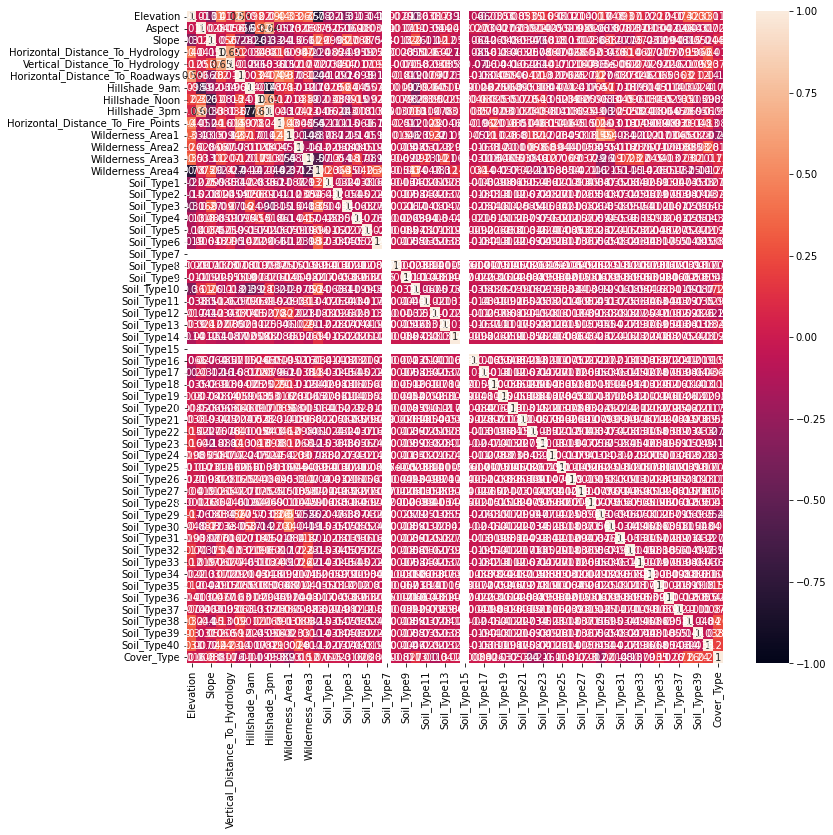

In [10]:
# Correlation matrix

sns.heatmap(train.corr(), annot=True, vmin=-1, vmax=1)

In [11]:
# Load the test data

test = pd.read_csv('test.csv', index_col='Id')
test.head()

Elevation  Aspect  Slope  ...  Soil_Type38  Soil_Type39  Soil_Type40
Id                               ...                                       
15121       2680     354     14  ...            0            0            0
15122       2683       0     13  ...            0            0            0
15123       2713      16     15  ...            0            0            0
15124       2709      24     17  ...            0            0            0
15125       2706      29     19  ...            0            0            0

[5 rows x 54 columns]

There are no missing values, in the data.

In [12]:
# Missing values

if train.isna().any().any():
    print(train.isna().sum()/train.shape[0])
else:
    print("No Missing values")

No Missing values


In [13]:
# Seperating out features and labels

X = train.drop(['Cover_Type'], axis=1)
y = train['Cover_Type']

In [14]:
# Train Test Split

X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.20, random_state=88)

## CatBoost

In [35]:
# Model Definition

model = ExtraTreesClassifier(verbose=1, n_jobs=-1)
model.fit(X_train, y_train)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:    0.6s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    1.2s finished


ExtraTreesClassifier(n_jobs=-1, verbose=1)

In [36]:
# Model Prediction

test_pred = model.predict(test)
test_pred

[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    4.2s
[Parallel(n_jobs=2)]: Done 100 out of 100 | elapsed:    9.2s finished


array([2, 1, 1, ..., 3, 3, 3])

In [37]:
# Generating output file

submission = pd.read_csv('/content/sampleSubmission.csv')
submission['Cover_Type'] = test_pred
submission.to_csv('output.csv', index=False)

In [38]:
# Submission

!kaggle competitions submit -c forest-cover-type-prediction -f output.csv -m "ExtraTrees"

100% 4.78M/4.78M [00:00<00:00, 8.83MB/s]
Successfully submitted to Forest Cover Type Prediction